<a href="https://colab.research.google.com/github/CatarinaCarneiroSilva/Analise-de-Dados/blob/main/MVP_Analise_dados_Catarina_Carneiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas
## Análise do Mercado de Trabalho no Setor Terciário na Paraíba

### Catarina Carneiro da Silva

#### 1. Definição do Problema

Neste estudo analisarei os dados do mercado de trabalho, com foco no setor terciário (comércio, serviços e turismo) e na Paraíba, para trabalhar com um dataset menor.

**Não há uma pergunta específica, apenas desejo verificar como o salário se comporta de acordo com o perfil dos colaboradores.**

O dataset usado neste projeto são os microdados da **RAIS 2022 (Relação Anual de Informações Sociais)**, proveniente do Ministério do Trabalho.
Essa base de informações é muito abrangente, podendo originar diversas inferências. No entanto, para limitar as opções e criar um estudo mais objetivo, utilizei um subconjunto da base original, considerando apenas algumas variáveis disponíveis.

Usarei o pacote Pandas (Python Data Analysis Library) para carregar o arquivo .csv elaborado com os microdados necessários.


In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carrega arquivo csv
url = "https://raw.githubusercontent.com/CatarinaCarneiroSilva/Analise-de-Dados/main/rais2002_cat_uf25.csv"
rais2022 = pd.read_csv(url,delimiter=';')
print(rais2022.head())
print(rais2022.info())

   CNAE 2.0 Classe  Faixa Etária  Escolaridade após 2005  Idade  Raça Cor  \
0            84116             7                       1     62        99   
1            84116             6                       1     46        99   
2            84116             7                       1     50        99   
3            84116             7                       1     60        99   
4            84116             7                       1     59        99   

   Sexo Trabalhador  uf  valor_remuneracao_media  
0                 1  25                  1941.66  
1                 1  25                  1246.83  
2                 1  25                  2325.60  
3                 1  25                  1805.24  
4                 1  25                  2315.60  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728139 entries, 0 to 728138
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CNAE 2

In [ ]:
# Verifica se há valores nulos
nulos = rais2022.isnull().sum()
print(nulos)

CNAE 2.0 Classe            0
Faixa Etária               0
Escolaridade após 2005     0
Idade                      0
Raça Cor                   0
Sexo Trabalhador           0
uf                         0
valor_remuneracao_media    0
dtype: int64


Ao observar as informações da tabela, pode-se perceber que o Dataframe possui 728.139 itens, com nenhum atributo apresentando dados nulos. São considerados números inteiros, menos a remuneração, que possui decimais, portanto não preciso me preocupar em converter varáveis categóricas.

#### 2. Catálogos de Dados

**CNAE 2.0 Classe** - CNAE da atividade do emprego segundo a classificação 2.0 com a segmentação por classe. Neste momento encontram-se todas as CNAES registradas na RAIS, no entanto para analisar somente o setor terciário, como pretendido, terei que filtrar apenas as classes entre 45111 e 69206 na próxima etapa.

In [4]:
print(rais2022['CNAE 2.0 Classe'].describe())

count    728139.00000
mean      63684.78560
std       25442.92279
min         977.00000
25%       46931.00000
50%       81214.00000
75%       84116.00000
max       97005.00000
Name: CNAE 2.0 Classe, dtype: float64


**Faixa Etária** - Faixa de idade do funcionário, valores esperados:

1-entre 10 a 14 anos/

2-entre 15 a 17 anos/

3-entre 18 a 24 anos/

4-entre 25 a 29 anos/

5-entre 30 a 39 anos/

6-entre 40 a 49 anos/

7-entre 50 a 64 anos/

8-65 anos ou mais.

In [5]:
print(rais2022['Faixa Etária']
      .value_counts()
      .to_frame('Contagem')
      .assign(Porcentagem=lambda x: (x['Contagem'] / x['Contagem'].sum() * 100).round()))

              Contagem  Porcentagem
Faixa Etária                       
5               217182         30.0
6               185488         25.0
7               135383         19.0
4                95087         13.0
3                77788         11.0
8                16434          2.0
2                  764          0.0
1                   13          0.0


Pode-se perceber que a maior parte (55%) do quadro de funcionários brasileiro concentra-se entre 30 e 49 anos, quando o ser humano está no auge do seu vigor físico e intelectual. Por outro lado, a menor parte corresponde as pessoas entre 10 a 14 anos, coerente por serem menores de idade e, portanto, este valor deveria estar até mesmo zerado. Na próxima etapa irei exclui esse grupo, já que é um percentual pequeno e não faz sentido legalmente.

**Escolaridade após 2005** - Escolaridade do funcionário, valores esperados:

1-Analfabeto

2-Até 5ª Incompleto

3-5ª Completo Fundamental

4-6ª a 9ª Fundamental

5-Fundamental Completo

6-Médio Incompleto

7-Médio Completo

8-Superior Incompleto

9-Superior Completo

10-Mestrado

11-Doutorado

In [6]:
print(rais2022['Escolaridade após 2005']
      .value_counts()
      .to_frame('Contagem')
      .assign(Porcentagem=lambda x: (x['Contagem'] / x['Contagem'].sum() * 100).round()))

                        Contagem  Porcentagem
Escolaridade após 2005                       
7                         341108         47.0
9                         155056         21.0
5                          95389         13.0
6                          30945          4.0
4                          28182          4.0
8                          25688          4.0
2                          20885          3.0
3                          13345          2.0
10                          7665          1.0
1                           6755          1.0
11                          3121          0.0


Pode-se perceber que a maior parte (47%) do quadro de funcionários brasileiro concentra-se no ensino médio completo, enquanto a menor parcela possui Doutorado. Apesar de ser um nível superior, as opções de emprego para os doutorandos são mais limitadas, o que explica esse resultado, além de ter menos pessoas que conseguem alcançar essa escolaridade.

**Idade** - Idade do funcionário.

In [7]:
print(rais2022['Idade'].describe())

count    728139.000000
mean         39.304055
std          11.915831
min          13.000000
25%          30.000000
50%          38.000000
75%          47.000000
max          96.000000
Name: Idade, dtype: float64


Por conter valores próximos de 96 e 13 anos, essa série causa estranhamento, assim como o grupo 1 da Faixa Etária. Por isso, gera necessidade de atenção ao se trabalhar com esses dados.

In [8]:
contagem_idades = rais2022['Idade'].value_counts()

# Filtrar as idades 13 e 96
contagem_13 = contagem_idades.get(13, 0)
contagem_96 = contagem_idades.get(96, 0)

# Exibir os resultados
print(f'Pessoas com 13 anos: {contagem_13}')
print(f'Pessoas com 96 anos: {contagem_96}')

Pessoas com 13 anos: 1
Pessoas com 96 anos: 1


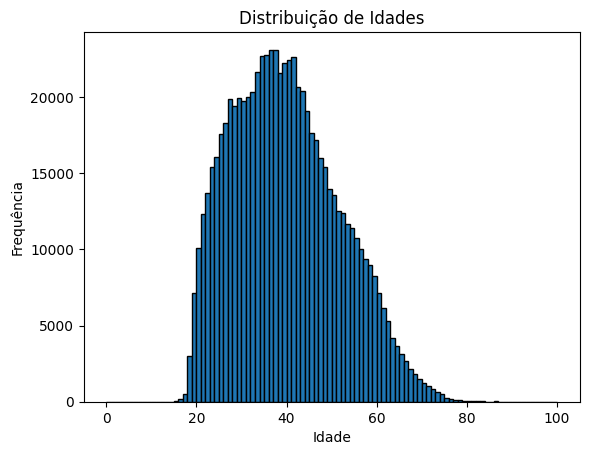

In [9]:
# Criar o histograma
plt.hist(rais2022['Idade'], bins=range(0, 101), edgecolor='black')

# Adicionar título e rótulos
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

 Ao observar com maior atenção, apenas uma pessoa corresponde a 13 anos e 1 com 96. Ou seja, apesar de ser estranho, está em pouca quantidade e o histograma confirma a menor frequência dentre os mais velhos.

 De qualquer forma, como já possuo dentre os meus atributos a Faixa Etária, que consegue agregar melhor os colaborados, irei excluir essa coluna para não ter dados repetidos.

**Raça Cor** - Raça/cor segundo funcionário, valores esperados:

1-Indígena

2- Branca

4- Preta

6- Amarela

8- Parda

9- Não informado

In [10]:
print(rais2022['Raça Cor']
      .value_counts()
      .to_frame('Contagem')
      .assign(Porcentagem=lambda x: (x['Contagem'] / x['Contagem'].sum() * 100).round()))

          Contagem  Porcentagem
Raça Cor                       
99          255258         35.0
8           254370         35.0
2           102897         14.0
9            95453         13.0
4            15933          2.0
6             3604          0.0
1              624          0.0


Na base de dados também encontrei a categoria 99, que são os dados informados como ignorados, tendo até mesmo uma grande proporção (35%). Na próxima etapa precisarei filtrar essas informações assim como a categoria 9 (não informado), que também representa uma parte considerável da amostra (13%).

Pode-se perceber que a maior parte (35%) do quadro de funcionários brasileiro se consideram pardos.

**Sexo** - Gênero segundo funcionário, valores esperados:

1- Masculino

2- Feminino

9- Ignorado

In [11]:
print(rais2022['Sexo Trabalhador']
      .value_counts()
      .to_frame('Contagem')
      .assign(Porcentagem=lambda x: (x['Contagem'] / x['Contagem'].sum() * 100).round()))

                  Contagem  Porcentagem
Sexo Trabalhador                       
1                   411649         57.0
2                   316490         43.0


Apesar de ter a opção 9, ela não aparece nos resultados da Paraíba.
Pode-se perceber que a maior parte (57%) do quadro de funcionários brasileiro no Estado concentra-se no público masculino. Portanto, a discrepância entre os gêneros corresponde a 14 pontos percentuais.

**UF** - Apenas o estado da Paraíba, com código 25, foi selecionado, portanto a série não irá demonstrar variação. Esse atributo será excluído na próxima etapa.

In [12]:
print(rais2022['uf'].describe())

count    728139.0
mean         25.0
std           0.0
min          25.0
25%          25.0
50%          25.0
75%          25.0
max          25.0
Name: uf, dtype: float64


**Valor_Remuneração_Média** - Remuneração média dos funcionários.

In [13]:
# Formatação da remuneração
pd.options.display.float_format = '{:,.2f}'.format

print(rais2022['valor_remuneracao_media'].describe())

count     728,139.00
mean        2,875.58
std         8,367.04
min             0.00
25%         1,287.50
50%         1,625.17
75%         2,645.61
max     2,350,575.09
Name: valor_remuneracao_media, dtype: float64


 O valor média recebido pelos brasileiros em geral corresponde a R$ 2.875,58. Enquanto uma parcela está com rendimentos zerados e outra recebendo mais de dois milhões, o que são números estranhos e precisam ser melhor analisados.

In [14]:
# Variáveis valores mínimo e máximo
valor_minimo = rais2022['valor_remuneracao_media'].min()
valor_maximo = rais2022['valor_remuneracao_media'].max()

# Contar quantas pessoas recebem o valor mínimo e máximo
contagem_minimo = (rais2022['valor_remuneracao_media'] == valor_minimo).sum()
contagem_maximo = (rais2022['valor_remuneracao_media'] == valor_maximo).sum()

# Exibir os resultados
print(f'Pessoas que recebem o valor mínimo ({valor_minimo}): {contagem_minimo}')
print(f'Pessoas que recebem o valor máximo ({valor_maximo}): {contagem_maximo}')

Pessoas que recebem o valor mínimo (0.0): 32620
Pessoas que recebem o valor máximo (2350575.09): 1


Apenas uma pessoa recebe esse valor máximo e 32.620 (aproximadamente 4% do total) possuem salário zerado, portanto, irei verificar a possibilidade de outliers.

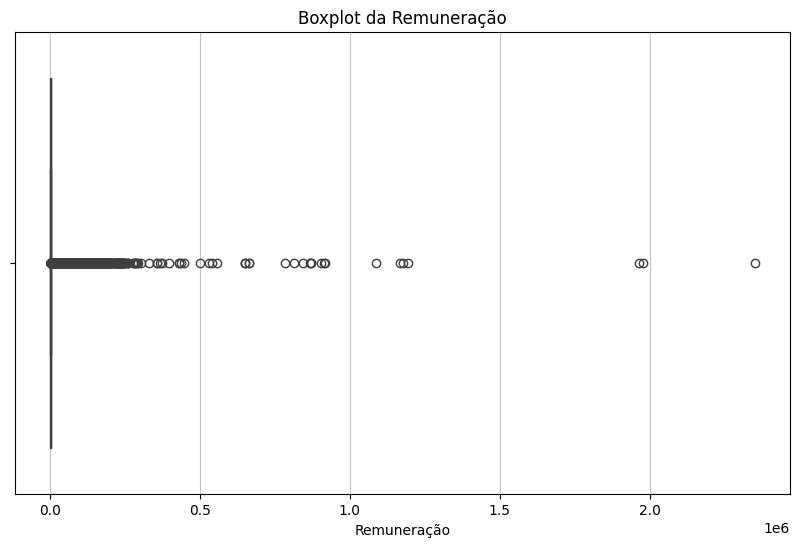

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=rais2022['valor_remuneracao_media'])
plt.title('Boxplot da Remuneração')
plt.xlabel('Remuneração')
plt.grid(axis='x', alpha=0.75)
plt.show()

A série apresenta alguns valores discrepantes, no entanto, como quero capturar a realidade do mercado de trabalho e suas desigualdades, irei retirar apenas o valor zero, pois não é muito realístico. Como pretendo analisar os valores exatos das remunerações, também não será necessária a discretização.

#### 3. Preparação de Dados

Para facilitar a análise e limpar a base de dados farei as transformações necessárias observadas ao se estudar as variáveis. Primeiro, como todos os dados são pertencentes a mesma UF, deletarei essa coluna. Em seguida, excluirei a coluna idade, já que os dados parecem estranhos (trabalhadores com 13 e 96 anos)  e na coluna Faixa Etária os valores já aparecem agrupados, o que facilita a análise e oferece maior credibilidade ao resultado.

Para trabalhar apenas o setor terciário, como pretendido, filtrarei a coluna CNAE para conter apenas as CNAES desse setor (entre as classes 45111 e 69206).

Para limpar o dataset, excluirei os seguintes dados: raça com informações ignoradas e não informadas, grupo 1 da Faixa Etária e o valor mínimo da remuneração.

Essas alterações serão realizadas em uma cópia do arquivo original, para que as informações não sejam perdidas, caso precisem ser acessadas em um próximo momento.

Não irei fazer nenhuma transformação nos dados porque pretendo analisar os números absolutos, assim como suas discrepâncias, por isso não será necessário normalizar, padronizar ou ajustar outliers de nenhuma série.

In [16]:
# Cria uma cópia de rais2022
rais2022_prep = rais2022.copy()

# Deletar coluna UF e Idade
del rais2022_prep['uf']
del rais2022_prep['Idade']

print(rais2022_prep.head())

   CNAE 2.0 Classe  Faixa Etária  Escolaridade após 2005  Raça Cor  \
0            84116             7                       1        99   
1            84116             6                       1        99   
2            84116             7                       1        99   
3            84116             7                       1        99   
4            84116             7                       1        99   

   Sexo Trabalhador  valor_remuneracao_media  
0                 1                 1,941.66  
1                 1                 1,246.83  
2                 1                 2,325.60  
3                 1                 1,805.24  
4                 1                 2,315.60  


In [17]:
# Filtrar coluna CNAE 2.0 Classe, Sexo Trabalhador, Raça Cor, Faixa Etária e Remuneração
rais2022_prep = rais2022_prep[(rais2022_prep['CNAE 2.0 Classe'] >= 45111) & (rais2022_prep['CNAE 2.0 Classe'] <= 69206)]
rais2022_prep = rais2022_prep[(rais2022_prep['Raça Cor'] != 9) & (rais2022_prep['Raça Cor'] != 99)]
rais2022_prep = rais2022_prep[(rais2022_prep['Faixa Etária'] != 1)]
rais2022_prep = rais2022_prep[(rais2022_prep['valor_remuneracao_media'] != valor_minimo)]

print(rais2022_prep.head())

     CNAE 2.0 Classe  Faixa Etária  Escolaridade após 2005  Raça Cor  \
237            46796             5                       1         2   
258            47555             6                       1         2   
274            62015             3                       1         2   
282            46796             4                       1         2   
283            46796             6                       1         2   

     Sexo Trabalhador  valor_remuneracao_media  
237                 1                 1,249.32  
258                 1                 1,293.60  
274                 1                 8,670.00  
282                 1                 1,255.18  
283                 1                 1,309.98  


###### 3.1. Estatísticas Descritivas

In [18]:
# Dimensões dos datasets
print(rais2022.shape)
print(rais2022_prep.shape)

(728139, 8)
(128468, 6)


In [19]:
# Informações do dataset
print(rais2022_prep.info())

<class 'pandas.core.frame.DataFrame'>
Index: 128468 entries, 237 to 728138
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CNAE 2.0 Classe          128468 non-null  int64  
 1   Faixa Etária             128468 non-null  int64  
 2   Escolaridade após 2005   128468 non-null  int64  
 3   Raça Cor                 128468 non-null  int64  
 4   Sexo Trabalhador         128468 non-null  int64  
 5   valor_remuneracao_media  128468 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 6.9 MB
None


In [20]:
# Verifica se há valores nulos
nulos = rais2022_prep.isnull().sum()
print(nulos)

CNAE 2.0 Classe            0
Faixa Etária               0
Escolaridade após 2005     0
Raça Cor                   0
Sexo Trabalhador           0
valor_remuneracao_media    0
dtype: int64


Examinando as dimensões do novo dataset, restaram 6 variáveis com 128.468 registros. As variáveis continuam como numerais, com a receita podendo conter decimais, e sem dados nulos.

In [21]:
# Resumo estatístico do dataset
rais2022.describe()

,CNAE 2.0 Classe,Faixa Etária,Escolaridade após 2005,Idade,Raça Cor,Sexo Trabalhador,uf,valor_remuneracao_media
count,"728,139.00","728,139.00","728,139.00","728,139.00","728,139.00","728,139.00","728,139.00","728,139.00"
mean,"63,684.79",5.35,6.82,39.30,39.08,1.43,25.00,"2,875.58"
std,"25,442.92",1.28,1.81,11.92,44.08,0.50,0.00,"8,367.04"
min,977.00,1.00,1.00,13.00,1.00,1.00,25.00,0.00
25%,"46,931.00",5.00,6.00,30.00,8.00,1.00,25.00,"1,287.50"
50%,"81,214.00",5.00,7.00,38.00,8.00,1.00,25.00,"1,625.17"
75%,"84,116.00",6.00,8.00,47.00,99.00,2.00,25.00,"2,645.61"
max,"97,005.00",8.00,11.00,96.00,99.00,2.00,25.00,"2,350,575.09"


In [23]:
rais2022_prep.describe()

,CNAE 2.0 Classe,Faixa Etária,Escolaridade após 2005,Raça Cor,Sexo Trabalhador,valor_remuneracao_media
count,"128,468.00","128,468.00","128,468.00","128,468.00","128,468.00","128,468.00"
mean,"50,552.58",4.92,6.94,6.11,1.39,"3,041.12"
std,"6,332.61",1.24,1.30,2.72,0.49,"12,325.64"
min,"45,111.00",2.00,1.00,1.00,1.00,363.60
25%,"47,113.00",4.00,7.00,2.00,1.00,"1,305.54"
50%,"47,547.00",5.00,7.00,8.00,1.00,"1,479.88"
75%,"52,401.00",6.00,7.00,8.00,2.00,"2,140.88"
max,"69,206.00",8.00,11.00,8.00,2.00,"1,964,156.42"


Ao comparar o dataset original com o originado após os ajustes, pode-se perceber algumas diferenças nas estatísticas, além da quantidade de dados.

A média da Faixa Etária foi reduzida, apesar de ter excluído a menor de todas (1), o que pode representar que o setor terciário possui como característica natural funcionários com menor idade.

A escolaridade e o gênero não tiveram grande modificação nas estatísticas, seguindo o padrão do mercado de trabalho em geral.

Já a média da categoria de Raça teve uma mudança brusca, mostrando o quando a parcela não informada e ignorada influenciava no resultado.

Em relação a remuneração média, ao excluir o valor mínimo e filtrar as CNAES, houve um aumento de cerca de 6% no valor médio, que alcançou R$ 3.041,12.

#### 4. Análise dos Dados

##### 4.1. Raça

Com os dados limpos e filtrados, começarei a exploração de dados. Como a variável de raça foi a mais alterada, será a primeira a ser avaliada.

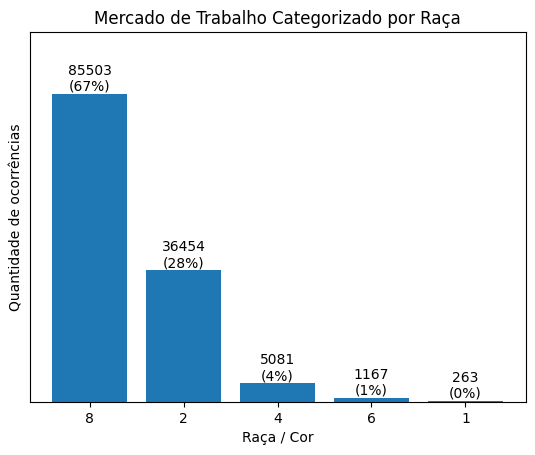

In [24]:
# Agrupar por categoria
grupo_raça = rais2022_prep['Raça Cor'].value_counts().reset_index()
grupo_raça.columns = ['Raça Cor', 'quantidade']

# Ordenar por quantidade em ordem decrescente
grupo_raça = grupo_raça.sort_values(by='quantidade', ascending=False)

# Calcular o total para obter as porcentagens
total = grupo_raça['quantidade'].sum()

# Criar a posição das barras
posicoes = range(len(grupo_raça['Raça Cor']))

# Criar o gráfico de barras
bars = plt.bar(posicoes, grupo_raça['quantidade'])

# Ajusta os limites do eixo Y para criar espaço acima das barras
plt.ylim(0, max(grupo_raça['quantidade']) * 1.2)

# Adicionar rótulos de dados com quantidade e porcentagem
for bar, quantidade in zip(bars, grupo_raça['quantidade']):
    altura = bar.get_height()
    porcentagem = (quantidade / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, altura,
             f'{int(quantidade)}\n({porcentagem:.0f}%)',
             ha='center', va='bottom')

# Remover números do eixo Y
plt.yticks([])

# Adicionar títulos e rótulos
plt.title('Mercado de Trabalho Categorizado por Raça')
plt.xlabel('Raça / Cor')
plt.ylabel('Quantidade de ocorrências')

# Ajustar os rótulos do eixo X
plt.xticks(posicoes, grupo_raça['Raça Cor'])

# Exibir o gráfico
plt.show()

A maior parte continuou se considerando Parda, contudo, ao se analisar apenas o setor terciário e sem os dados não informados e ignorados, o percentual aumentou para 67%, tendo uma concentração ainda maior do que no quadro geral.

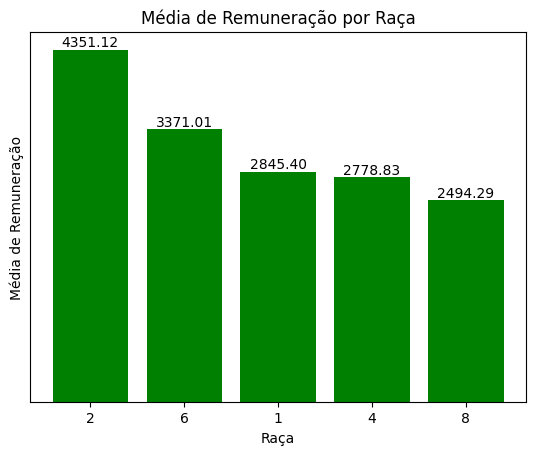

In [25]:
# Agrupar por Raça e calcular a média de remuneração
grupo_remuneracao = rais2022_prep.groupby('Raça Cor')['valor_remuneracao_media'].mean().reset_index()

# Ordenar por média de remuneração em ordem decrescente
grupo_remuneracao = grupo_remuneracao.sort_values(by='valor_remuneracao_media', ascending=False)

# Criar a posição das barras
posicoes = range(len(grupo_remuneracao['Raça Cor']))

# Criar o gráfico de barras com barras verdes
bars = plt.bar(posicoes, grupo_remuneracao['valor_remuneracao_media'], color='green')

# Adicionar rótulos de dados
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura,
             f'{altura:.2f}',
             ha='center', va='bottom')

# Adicionar títulos e rótulos
plt.title('Média de Remuneração por Raça')
plt.xlabel('Raça')
plt.ylabel('Média de Remuneração')

# Remover números do eixo Y
plt.yticks([])

# Ajustar os rótulos do eixo X
plt.xticks(posicoes, grupo_remuneracao['Raça Cor'])

# Exibir o gráfico
plt.show()

Mesmo tendo o maior percentual de pessoas trabalhando, o grupo 8 apresenta o menor nível médio de remuneração (R\$ 2.494,29), estando os funcionários considerados brancos com os maiores salários (R$ 4.351,12), salário quase 30% acima do segundo colocado, amarelos.

##### 4.2. Faixa Etária

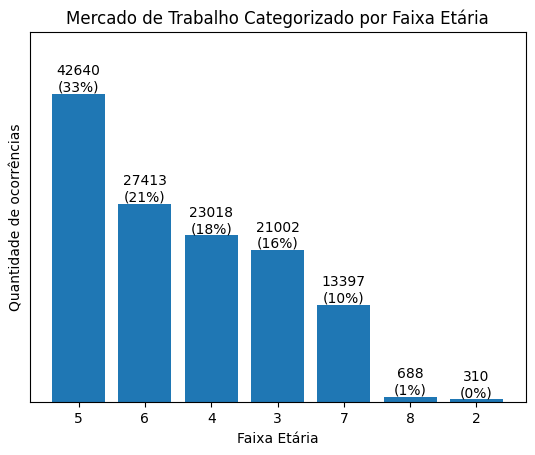

In [26]:
# Agrupar por categoria
grupo_faixa = rais2022_prep['Faixa Etária'].value_counts().reset_index()
grupo_faixa.columns = ['Faixa Etária', 'quantidade']

# Ordenar por quantidade em ordem decrescente
grupo_faixa = grupo_faixa.sort_values(by='quantidade', ascending=False)

# Calcular o total para obter as porcentagens
total = grupo_faixa['quantidade'].sum()

# Criar a posição das barras
posicoes = range(len(grupo_faixa['Faixa Etária']))

# Criar o gráfico de barras
bars = plt.bar(posicoes, grupo_faixa['quantidade'])

# Ajustar os limites do eixo Y para criar espaço acima das barras
plt.ylim(0, max(grupo_faixa['quantidade']) * 1.2)

# Adicionar rótulos de dados com quantidade e porcentagem
for bar, quantidade in zip(bars, grupo_faixa['quantidade']):
    altura = bar.get_height()
    porcentagem = (quantidade / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, altura,
             f'{int(quantidade)}\n({porcentagem:.0f}%)',
             ha='center', va='bottom')

# Remover números do eixo Y
plt.yticks([])

# Adicionar títulos e rótulos
plt.title('Mercado de Trabalho Categorizado por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de ocorrências')

# Ajustar os rótulos do eixo X
plt.xticks(posicoes, grupo_faixa['Faixa Etária'])

# Exibir o gráfico
plt.show()

A maior parte do quadro de funcionários permanece entre 30 e 49 anos (54%). Porém, há uma discrepância maior em relação ao quadro geral entre a quantidade que possui entre 30 e 39 e aqueles entre 40 e 49, neste caso a diferença de representatividade entre os grupos é de 12 pontos percentuais e nos dados como observado anteriormente a disparidade foi de 5 pontos percentuais.

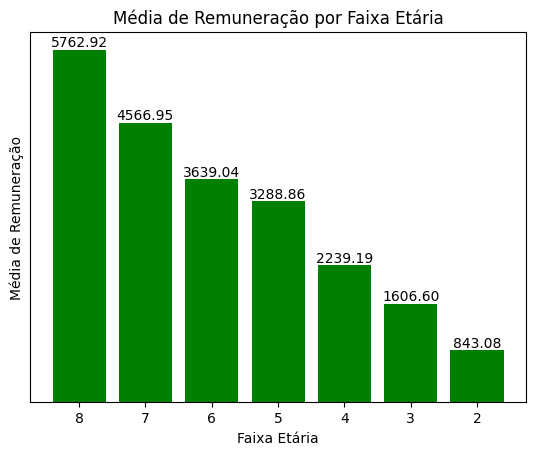

In [27]:
# Agrupar por Faixa Etária e calcular a média de remuneração
grupo_remuneracao = rais2022_prep.groupby('Faixa Etária')['valor_remuneracao_media'].mean().reset_index()

# Ordenar por média de remuneração em ordem decrescente
grupo_remuneracao = grupo_remuneracao.sort_values(by='valor_remuneracao_media', ascending=False)

# Criar a posição das barras
posicoes = range(len(grupo_remuneracao['Faixa Etária']))

# Criar o gráfico de barras com barras verdes
bars = plt.bar(posicoes, grupo_remuneracao['valor_remuneracao_media'], color='green')

# Adicionar rótulos de dados
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura,
             f'{altura:.2f}',
             ha='center', va='bottom')

# Adicionar títulos e rótulos
plt.title('Média de Remuneração por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Remuneração')

# Remover números do eixo Y
plt.yticks([])

# Ajustar os rótulos do eixo X
plt.xticks(posicoes, grupo_remuneracao['Faixa Etária'])

# Exibir o gráfico
plt.show()

Em relação a remuneração média, pode-se observar quanto maior a idade, maior será o valor recebido, devido principalmente aos anos de experiência no mercado de trabalho. Com isso, pode-se esperar uma correlação entre os dados, que será calculada ao se analisar a remuneração.

##### 4.3. Escolaridade

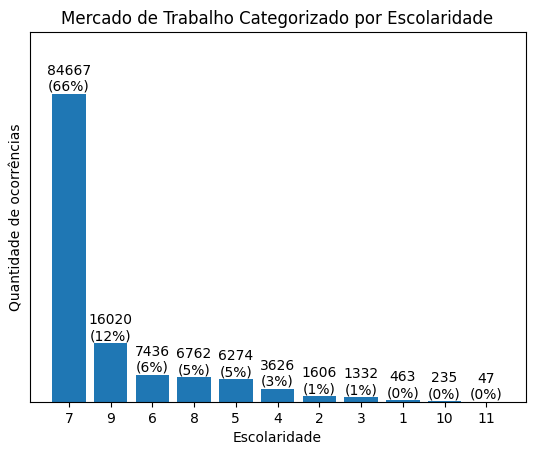

In [28]:
# Agrupar por categoria
grupo_escolaridade = rais2022_prep['Escolaridade após 2005'].value_counts().reset_index()
grupo_escolaridade.columns = ['Escolaridade após 2005', 'quantidade']

# Ordenar por quantidade em ordem decrescente
grupo_escolaridade = grupo_escolaridade.sort_values(by='quantidade', ascending=False)

# Calcular o total para obter as porcentagens
total = grupo_escolaridade['quantidade'].sum()

# Criar a posição das barras
posicoes = range(len(grupo_escolaridade['Escolaridade após 2005']))

# Criar o gráfico de barras
bars = plt.bar(posicoes, grupo_escolaridade['quantidade'])

# Ajustar os limites do eixo Y para criar espaço acima das barras
plt.ylim(0, max(grupo_escolaridade['quantidade']) * 1.2)

# Adicionar rótulos de dados com quantidade e porcentagem
for bar, quantidade in zip(bars, grupo_escolaridade['quantidade']):
    altura = bar.get_height()
    porcentagem = (quantidade / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, altura,
             f'{int(quantidade)}\n({porcentagem:.0f}%)',
             ha='center', va='bottom')

# Remover números do eixo Y
plt.yticks([])

# Adicionar títulos e rótulos
plt.title('Mercado de Trabalho Categorizado por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade de ocorrências')

# Ajustar os rótulos do eixo X
plt.xticks(posicoes, grupo_escolaridade['Escolaridade após 2005'])

# Exibir o gráfico
plt.show()

A escolaridade dos colaboradores manteve um perfil semelhante nos valores extremos ao observar o setor terciário, com a maior parte (66%) tendo o ensino médio completo, seguido por quem tem o ensino superior completo (12%). Nesse caso, assim como na faixa etária, há uma discrepância maior entre esses dois primeiros grupos (diferença de 54 pontos percentuais) do que no quadro geral (26 pontos percentuais).

Outra diferença observada é que aqueles que possuem mestrado representam o segundo menor grupo, enquanto era o terceiro no quadro geral. Revelando que para o comércio, serviços e turismo há quase o dobro de mais analfabetos empregados do que mestres.

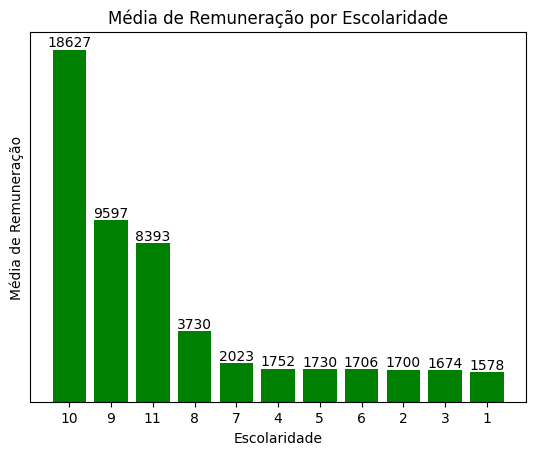

In [29]:
# Agrupar por Escolaridade e calcular a média de remuneração
grupo_remuneracao = rais2022_prep.groupby('Escolaridade após 2005')['valor_remuneracao_media'].mean().reset_index()

# Ordenar por média de remuneração em ordem decrescente
grupo_remuneracao = grupo_remuneracao.sort_values(by='valor_remuneracao_media', ascending=False)

# Criar a posição das barras
posicoes = range(len(grupo_remuneracao['Escolaridade após 2005']))

# Criar o gráfico de barras com barras verdes
bars = plt.bar(posicoes, grupo_remuneracao['valor_remuneracao_media'], color='green')

# Adicionar rótulos de dados
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura,
             str(int(altura)),
             ha='center', va='bottom')

# Adicionar títulos e rótulos
plt.title('Média de Remuneração por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Média de Remuneração')

# Remover números do eixo Y
plt.yticks([])

# Ajustar os rótulos do eixo X
plt.xticks(posicoes, grupo_remuneracao['Escolaridade após 2005'])

# Exibir o gráfico
plt.show()

Mesmo estando em menor quantidade, os que possuem mestrado são exatamente aqueles com maior remuneração média (R$ 18.627). Interessante observar que quem possui ensino superior completo em média recebe salário maior do que quem possui diploma de doutorado, diferença de aproximadamente 15%, uma das explicações possíveis é a escassez de trabalho para esse grupo mais qualificado.

##### 4.4. Gênero

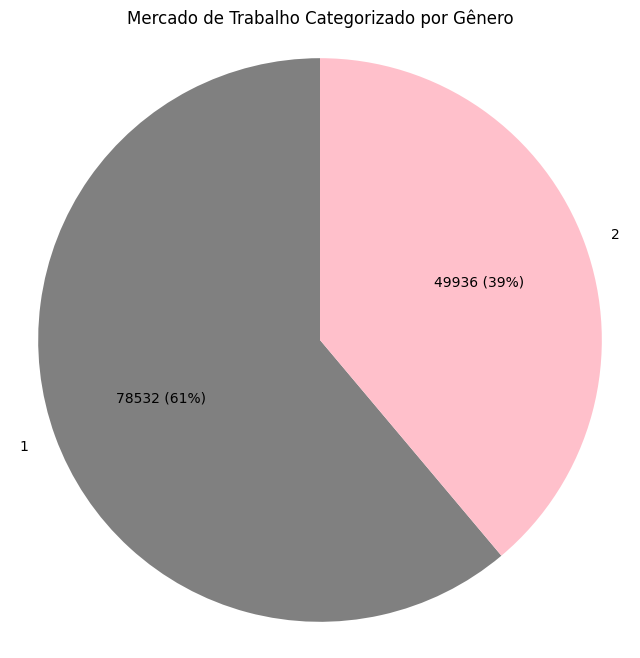

In [30]:
# Agrupar por categoria
grupo_genero = rais2022_prep['Sexo Trabalhador'].value_counts().reset_index()
grupo_genero.columns = ['Sexo Trabalhador', 'quantidade']

# Ordenar por quantidade em ordem decrescente
grupo_genero = grupo_genero.sort_values(by='quantidade', ascending=False)

# Definir as cores: cinza para homens e rosa para mulheres
cores = ['gray', 'pink'] + ['lightblue'] * (len(grupo_genero) - 2)

# Formatar os rótulos
def rotulo(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute} ({round(pct)}%)'

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(grupo_genero['quantidade'], labels=grupo_genero['Sexo Trabalhador'],
        autopct=lambda pct: rotulo(pct, grupo_genero['quantidade']),
        startangle=90, colors=cores)

# Adicionar título
plt.title('Mercado de Trabalho Categorizado por Gênero')

# Exibir o gráfico
plt.axis('equal')
plt.show()

No setor terciário, os homens representam 61% da força de trabalho, frente a 39% para a quantidade de mulheres. Nesse caso, a diferença de representatividade entre funcionários homens e mulheres é de 22 pontos percentuais, maior do que no quadro geral (14 pontos percentuais).

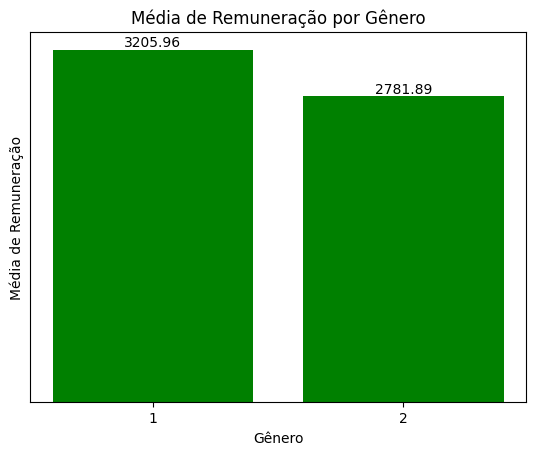

In [31]:
# Agrupar por Gênero e calcular a média de remuneração
grupo_remuneracao = rais2022_prep.groupby('Sexo Trabalhador')['valor_remuneracao_media'].mean().reset_index()

# Ordenar por média de remuneração em ordem decrescente
grupo_remuneracao = grupo_remuneracao.sort_values(by='valor_remuneracao_media', ascending=False)

# Criar a posição das barras
posicoes = range(len(grupo_remuneracao['Sexo Trabalhador']))

# Criar o gráfico de barras com barras verdes
bars = plt.bar(posicoes, grupo_remuneracao['valor_remuneracao_media'], color='green')

# Adicionar rótulos de dados
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, altura,
             f'{altura:.2f}',
             ha='center', va='bottom')

# Adicionar títulos e rótulos
plt.title('Média de Remuneração por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Remuneração')

# Remover números do eixo Y
plt.yticks([])

# Ajustar os rótulos do eixo X
plt.xticks(posicoes, grupo_remuneracao['Sexo Trabalhador'])

# Exibir o gráfico
plt.show()

Pode-se aferir que, além deles terem maior preponderância no mercado de trabalho do comércio, serviços e turismo, também possuem um salário 15% maior do que o público feminino.

##### 4.5. CNAE

Para facilitar na análise e procura das CNAEs, carreguei um arquivo com a listagem das classes das CNAES que peguei também no Ministério do Trabalho.
Assim, de acordo com a classe que desejo verificar, basta pesquisar no dicionário.

In [32]:
# Carrega arquivo csv com a codificação correta
url = "https://raw.githubusercontent.com/CatarinaCarneiroSilva/Analise-de-Dados/main/dicionario.csv"
dicionario = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')
print(dicionario.head())

  CLASSE                CNAE
0    900       Não Informada
1    977       Não Se Aplica
2    988            Inválida
3    999            Ignorada
4   1113  Cultivo de Cereais


In [34]:
# Contar o número de trabalhadores por CNAE
cnae_counts = rais2022_prep['CNAE 2.0 Classe'].value_counts().reset_index()
cnae_counts.columns = ['CNAE 2.0 Classe', 'quantidade']

# CNAE com mais e menos trabalhadores
cnae_max = cnae_counts.loc[cnae_counts['quantidade'].idxmax()]
cnae_min = cnae_counts.loc[cnae_counts['quantidade'].idxmin()]

print(f'A CNAE com mais trabalhadores é {cnae_max["CNAE 2.0 Classe"]} com {cnae_max["quantidade"]} trabalhadores.')
print(f'A CNAE com menos trabalhadores é {cnae_min["CNAE 2.0 Classe"]} com {cnae_min["quantidade"]} trabalhadores.')

A CNAE com mais trabalhadores é 47113 com 10880 trabalhadores.
A CNAE com menos trabalhadores é 58123 com 1 trabalhadores.


In [35]:
# Função para buscar a descrição da CNAE
def buscar_cnae(cnae):
    resultado = dicionario[dicionario['CLASSE'] == cnae]
    if not resultado.empty:
        return resultado
    else:
        return 'CNAE não encontrado.'

# Exemplo de uso
cnae_digitado = input('Digite a classe CNAE: ')
descricao = buscar_cnae(cnae_digitado)
print(buscar_cnae(cnae_digitado).to_string(index=False))

Digite a classe CNAE: 58123
CLASSE              CNAE
 58123 Edição de Jornais


A classe 47113 representa o "Comércio Varejista de Mercadorias em Geral, com Predominância de Produtos Alimentícios - Hipermercados e Supermercados", mostrando que esse segmento representa o maior contratante do setor terciário, com 10.880 funcionários no Estado.

Enquanto a classe 58123 representa a "Edição de Jornais", tendo a menor quantidade de funcionário (1), coerente com uma momento em que as mídias socias e o mundo digital vem se intensificando.

In [36]:
# Agrupar por CNAE e calcular a média da remuneração
cnae_remuneracao_media = rais2022_prep.groupby('CNAE 2.0 Classe')['valor_remuneracao_media'].mean().reset_index()

# Encontrar o CNAE com a maior e menor remuneração
cnae_max_remuneracao = cnae_remuneracao_media.loc[cnae_remuneracao_media['valor_remuneracao_media'].idxmax()]
cnae_min_remuneracao = cnae_remuneracao_media.loc[cnae_remuneracao_media['valor_remuneracao_media'].idxmin()]

print(f'A CNAE com a maior remuneração média é {cnae_max_remuneracao["CNAE 2.0 Classe"]} com R$ {cnae_max_remuneracao["valor_remuneracao_media"]:.2f}.')
print(f'A CNAE com a menor remuneração média é {cnae_min_remuneracao["CNAE 2.0 Classe"]} com R$ {cnae_min_remuneracao["valor_remuneracao_media"]:.2f}.')

A CNAE com a maior remuneração média é 64239.0 com R$ 41069.14.
A CNAE com a menor remuneração média é 58212.0 com R$ 1175.03.


In [37]:
# Função para buscar a descrição da CNAE
def buscar_cnae(cnae):
    resultado = dicionario[dicionario['CLASSE'] == cnae]
    if not resultado.empty:
        return resultado
    else:
        return 'CNAE não encontrado.'

# Exemplo de uso
cnae_digitado = input('Digite a classe CNAE: ')
descricao = buscar_cnae(cnae_digitado)
print(buscar_cnae(cnae_digitado).to_string(index=False))

Digite a classe CNAE: 64239
CLASSE              CNAE
 64239 Caixas Econômicas


A classe 64239 representa as "Caixas Econômicas". Era esperado que uma função relacionada ao mercado financeiro seria a de maior remuneração, o fato de ser um estabelecimento público também ajuda a explicar os maiores salários.
Enquanto a classe 58212 representa "Edição Integrada à Impressão de Livros", que sofre do mesmo problema da edição de jornais, com a maior procura por livros digitais.

##### 4.6. Remuneração

In [38]:
variaveis_selecionadas = ['valor_remuneracao_media', 'Escolaridade após 2005', 'Faixa Etária', 'Sexo Trabalhador']
correlacao = rais2022_prep[variaveis_selecionadas].corr()['valor_remuneracao_media'].sort_values(ascending=False)
print(correlacao)

valor_remuneracao_media    1.00
Escolaridade após 2005     0.14
Faixa Etária               0.07
Sexo Trabalhador          -0.02
Name: valor_remuneracao_media, dtype: float64


Ao analisar as correlações, quanto maior a escolaridade, maior será a remuneração. O mesmo efeito ocorre na faixa etária, com os funcionários mais velhos recebendo salários maiores, o que já havia sido observado nas análises dos dados, no entanto com influência menor do que o nível educacional.

Já em relação ao gênero, as mulheres tendem a recebem remunerações menores, dado que a correlação é negativa e elas representam o grupo de maior nhúmero (2). No entanto, o efeito não é tão grande quando das outras variáveis.

A raça e as CNAES não foram adicionadas porque não há uma ordem numeral clara para analisar.

#### 5. Avaliação de Resultados

Após a preparação e análise dos dados do mercado de trabalho para a Paraíba no setor de comércio, serviços e turismo em 2022, verificou-se que a maior parte dos trabalhadores se identifica como Parda (67%). No entanto, esse grupo apresenta a menor remuneração média (R\$ 2.494,29), enquanto os trabalhadores brancos recebem os salários mais elevados (R$ 4.351,12), quase 30% a mais do que o segundo grupo mais bem remunerado, os amarelos.

Em termos de faixa etária, mais da metade dos funcionários (54%) tem entre 30 e 49 anos, sendo que aqueles entre 30 e 39 anos superam os de 40 a 49 anos por 12 pontos percentuais. Os indicadores de correlação mostraram que, embora a remuneração média aumente com a idade, o nível educacional é a variável com maior impacto sobre os salários.

A maioria dos trabalhadores (66%) possui o ensino médio completo, seguido por 12% com ensino superior completo, refletindo uma grande discrepância, de 54 pontos percentuais, entre os dois primeiros grupos. Um dado que chama a atenção é o fato de que pessoas com mestrado e doutorado representam os menores grupos de trabalhadores, o que revela uma realidade peculiar no setor terciário, onde há mais analfabetos empregados do que mestres. Apesar de sua baixa representatividade, aqueles com mestrado recebem as maiores remunerações médias (R$ 18.627). Curiosamente, trabalhadores com ensino superior completo têm salários médios superiores aos daqueles com doutorado, possivelmente devido à falta de oportunidades adequadas para esse grupo altamente qualificado. De forma geral, os dados confirmam que quanto maior a escolaridade, maior a remuneração, sendo o item de maior influência.

No que tange à representatividade de gênero, os homens dominam o mercado de trabalho no setor terciário, com uma diferença de 22 pontos percentuais em relação às mulheres, além de receberem salários 15% superiores. A correlação negativa entre gênero e remuneração mostra a tendência de salários mais baixos para as mulheres, embora a influência dessa variável seja menos significativa em comparação a outras analisadas.

Em termos de setores específicos, o "Comércio Varejista de Mercadorias em Geral, com Predominância de Produtos Alimentícios - Hipermercados e Supermercados" foi o maior empregador em 2022, enquanto a "Edição de Jornais" teve o menor número de funcionários. No que diz respeito às remunerações, as "Caixas Econômicas" ofereceram os maiores salários, enquanto a "Edição Integrada à Impressão de Livros" apresentou os menores valores.

Esses resultados refletem apenas a realidade do estado da Paraíba e do setor de comércio, serviços e turismo. Para uma análise mais abrangente, seria relevante expandir o estudo para o nível nacional e incluir outras atividades econômicas, verificando se as características do mercado de trabalho observadas se mantêm em diferentes contextos. No entanto, os achados deste estudo já evidenciam importantes desigualdades de raça, gênero e educação, que devem ser considerados ao discutir políticas públicas e estratégias empresariais para a melhoria do mercado de trabalho.